In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
%config InlineBackend.figure_format = 'retina'

# Binary Classification: the IMDB dataset

The dataset in keras has already been preprocessed. The reviews have been converted into sequences of integers.

In [2]:
#DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb.npz'
data = np.load('imdb.npz', allow_pickle=True)

In [3]:
for line in data:
    print(line)

x_test
x_train
y_train
y_test


In [4]:
train_data = data['x_train']
train_labels = data['y_train']
test_data = data['x_test']
test_labels = data['y_test']

The above is a workaround due to getting SSL errors from the load_data() method in keras. The .npz file can be downloaded directly from the Google APIs site, and then loaded using Numpy.

In [5]:
train_data[0:1]

array([list([23022, 309, 6, 3, 1069, 209, 9, 2175, 30, 1, 169, 55, 14, 46, 82, 5869, 41, 393, 110, 138, 14, 5359, 58, 4477, 150, 8, 1, 5032, 5948, 482, 69, 5, 261, 12, 23022, 73935, 2003, 6, 73, 2436, 5, 632, 71, 6, 5359, 1, 25279, 5, 2004, 10471, 1, 5941, 1534, 34, 67, 64, 205, 140, 65, 1232, 63526, 21145, 1, 49265, 4, 1, 223, 901, 29, 3024, 69, 4, 1, 5863, 10, 694, 2, 65, 1534, 51, 10, 216, 1, 387, 8, 60, 3, 1472, 3724, 802, 5, 3521, 177, 1, 393, 10, 1238, 14030, 30, 309, 3, 353, 344, 2989, 143, 130, 5, 7804, 28, 4, 126, 5359, 1472, 2375, 5, 23022, 309, 10, 532, 12, 108, 1470, 4, 58, 556, 101, 12, 23022, 309, 6, 227, 4187, 48, 3, 2237, 12, 9, 215])],
      dtype=object)

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

88584

In [8]:
train_data.shape

(25000,)

In [ ]:
x = np.random.randint(0, 10, 10)

In [ ]:
x

In [ ]:
x = x[x<5]

In [ ]:
x

In the book, the training and testing data is limited to the top 10000 words, but that was implemented using the _load_data()_ function, which is not working for me. Instead, I must manually filter the data using the technique shown above. Otherwise, all 88,584 words are included!

In [9]:
train_data_filtered = []
for i in range(len(train_data)):
    train_data_instance = np.asarray(train_data[i])
    train_data_filt = train_data_instance[train_data_instance<10000]
    train_data_filtered.append(train_data_filt)

In [10]:
train_data_filtered = np.asarray(train_data_filtered)

In [11]:
train_data_filtered[0]

array([ 309,    6,    3, 1069,  209,    9, 2175,   30,    1,  169,   55,
         14,   46,   82, 5869,   41,  393,  110,  138,   14, 5359,   58,
       4477,  150,    8,    1, 5032, 5948,  482,   69,    5,  261,   12,
       2003,    6,   73, 2436,    5,  632,   71,    6, 5359,    1,    5,
       2004,    1, 5941, 1534,   34,   67,   64,  205,  140,   65, 1232,
          1,    4,    1,  223,  901,   29, 3024,   69,    4,    1, 5863,
         10,  694,    2,   65, 1534,   51,   10,  216,    1,  387,    8,
         60,    3, 1472, 3724,  802,    5, 3521,  177,    1,  393,   10,
       1238,   30,  309,    3,  353,  344, 2989,  143,  130,    5, 7804,
         28,    4,  126, 5359, 1472, 2375,    5,  309,   10,  532,   12,
        108, 1470,    4,   58,  556,  101,   12,  309,    6,  227, 4187,
         48,    3, 2237,   12,    9,  215])

In [12]:
max([max(sequence) for sequence in train_data_filtered])

9999

In [13]:
test_data_filtered = []
for i in range(len(test_data)):
    test_data_instance = np.asarray(test_data[i])
    test_data_filt = test_data_instance[test_data_instance<10000]
    test_data_filtered.append(test_data_filt)

In [14]:
test_data_filtered = np.asarray(test_data_filtered)

We can't feed lists of integers to a neural network, so we will one-hot encode the entries.

In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # puts a 1 in the integer location of the vector of zeros 
    return results

In [16]:
train_data_filtered[0]

array([ 309,    6,    3, 1069,  209,    9, 2175,   30,    1,  169,   55,
         14,   46,   82, 5869,   41,  393,  110,  138,   14, 5359,   58,
       4477,  150,    8,    1, 5032, 5948,  482,   69,    5,  261,   12,
       2003,    6,   73, 2436,    5,  632,   71,    6, 5359,    1,    5,
       2004,    1, 5941, 1534,   34,   67,   64,  205,  140,   65, 1232,
          1,    4,    1,  223,  901,   29, 3024,   69,    4,    1, 5863,
         10,  694,    2,   65, 1534,   51,   10,  216,    1,  387,    8,
         60,    3, 1472, 3724,  802,    5, 3521,  177,    1,  393,   10,
       1238,   30,  309,    3,  353,  344, 2989,  143,  130,    5, 7804,
         28,    4,  126, 5359, 1472, 2375,    5,  309,   10,  532,   12,
        108, 1470,    4,   58,  556,  101,   12,  309,    6,  227, 4187,
         48,    3, 2237,   12,    9,  215])

In [17]:
x_train = vectorize_sequences(train_data_filtered)

In [18]:
x_test = vectorize_sequences(test_data_filtered)

In [19]:
x_train.shape

(25000, 10000)

In [20]:
x_train[0, 0:16]

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.])

In [ ]:
for i, sequence in enumerate(train_data_filtered[:2]):
    print(f'i: {i}, seq: {sequence}')

The above code appears to be working properly. Now, time to convert the labels.

In [21]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model Implementation

We will now create a model with two dense layers and one output neuron that will give the probability of the review being positive.

In [22]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [25]:
x_val = x_train[:10000]
x_train_partial = x_train[10000:]
y_val = y_train[:10000]
y_train_partial = y_train[10000:]

We can also pass a custom loss rate to the optimizer by passing an optimizer class instance. This can also be done for the loss and metrics.

In [26]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.01),
             loss=keras.losses.binary_crossentropy,
             metrics=[keras.metrics.binary_accuracy])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train_partial, y_train_partial,
                   batch_size=512, epochs=20,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 160us/sample - loss: 0.3610 - binary_accuracy: 0.8117 - val_loss: 0.8153 - val_binary_accuracy: 0.6505
Epoch 2/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.1755 - binary_accuracy: 0.9407 - val_loss: 0.9864 - val_binary_accuracy: 0.6564
Epoch 3/20
15000/15000 [==============================] - 1s 55us/sample - loss: 0.0998 - binary_accuracy: 0.9657 - val_loss: 0.8243 - val_binary_accuracy: 0.7543
Epoch 4/20
15000/15000 [==============================] - 1s 55us/sample - loss: 0.0711 - binary_accuracy: 0.9755 - val_loss: 1.6873 - val_binary_accuracy: 0.6056
Epoch 5/20
15000/15000 [==============================] - 1s 55us/sample - loss: 0.0536 - binary_accuracy: 0.9823 - val_loss: 3.1398 - val_binary_accuracy: 0.4675
Epoch 6/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.0176 - binary_accuracy: 0.9959 - val_loss: 3.3073 -

In [29]:
history_dict = history.history

In [30]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [31]:
import matplotlib.pyplot as plt

In [32]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['binary_accuracy']) + 1)

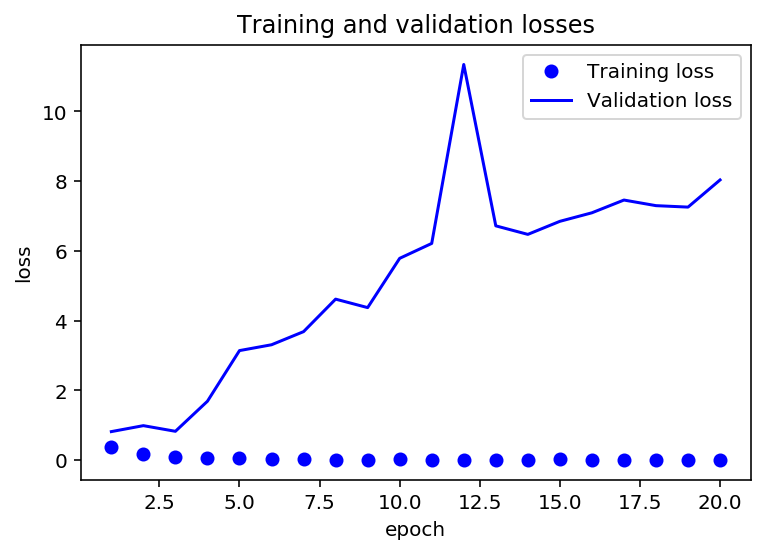

In [33]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [34]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

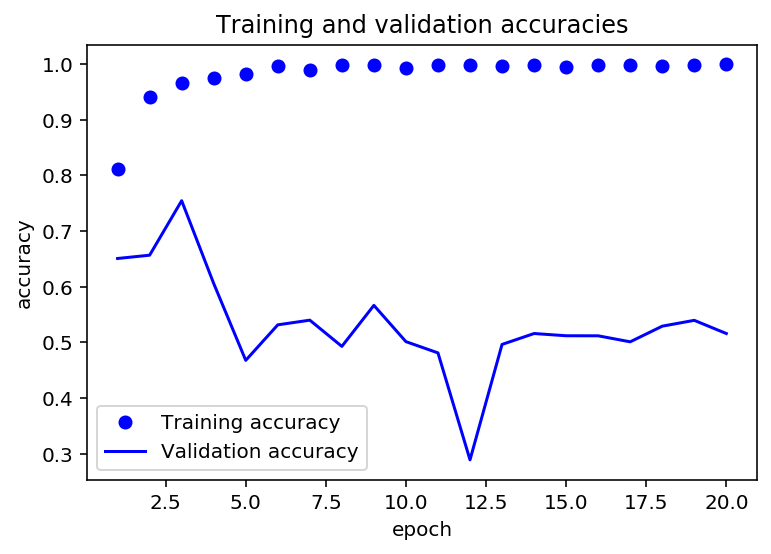

In [35]:
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

It's clear we are overfitting here. We'll run the model again, this time only running 4 epochs.

In [36]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 74us/sample - loss: 1.0267 - accuracy: 0.8598
Epoch 2/4
25000/25000 [==============================] - 1s 39us/sample - loss: 0.4298 - accuracy: 0.8790
Epoch 3/4
25000/25000 [==============================] - 1s 37us/sample - loss: 0.3107 - accuracy: 0.8932
Epoch 4/4
25000/25000 [==============================] - 1s 35us/sample - loss: 0.2622 - accuracy: 0.9042


In [38]:
results = model.evaluate(x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [39]:
results

[0.42354590406417847, 0.84056]

In [40]:
model.predict(x_test)

array([[0.98744696],
       [0.98744696],
       [0.98744696],
       ...,
       [0.77687836],
       [0.24404651],
       [0.9648783 ]], dtype=float32)

For the next two models, we will attempt using more hidden units per layer, and then an additional hidden layer.

In [41]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [43]:
history = model.fit(x_train_partial, y_train_partial,
                    epochs=20, batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 148us/sample - loss: 0.3785 - acc: 0.8335 - val_loss: 1.2298 - val_acc: 0.1542
Epoch 2/20
15000/15000 [==============================] - 1s 63us/sample - loss: 0.2039 - acc: 0.9231 - val_loss: 1.2966 - val_acc: 0.3414
Epoch 3/20
15000/15000 [==============================] - 1s 65us/sample - loss: 0.1290 - acc: 0.9579 - val_loss: 1.5362 - val_acc: 0.3782
Epoch 4/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.0867 - acc: 0.9745 - val_loss: 0.9623 - val_acc: 0.6336
Epoch 5/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.0600 - acc: 0.9844 - val_loss: 1.0710 - val_acc: 0.6374
Epoch 6/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.0429 - acc: 0.9895 - val_loss: 1.8755 - val_acc: 0.5004
Epoch 7/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.0264 - acc: 0.9947 - val_loss: 2

In [44]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

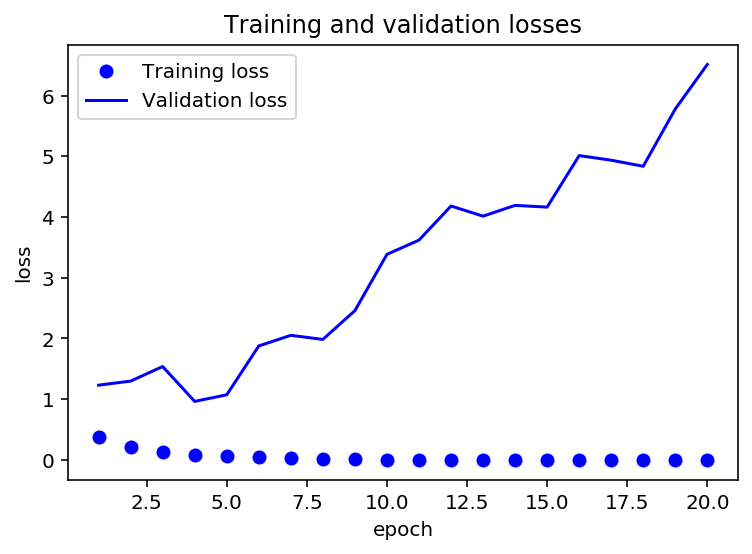

In [45]:
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

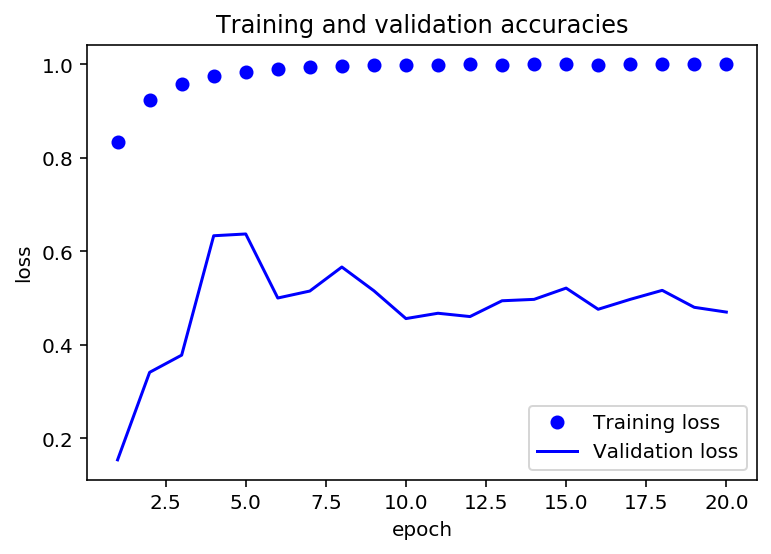

In [46]:
plt.plot(epochs, history.history['acc'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_acc'], 'b', label='Validation loss')
plt.title('Training and validation accuracies')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [47]:
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [49]:
history = model.fit(x_train_partial, y_train_partial,
                    epochs=20, batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 138us/sample - loss: 0.4860 - acc: 0.8159 - val_loss: 1.5407 - val_acc: 0.0000e+00
Epoch 2/20
15000/15000 [==============================] - 1s 57us/sample - loss: 0.3173 - acc: 0.8633 - val_loss: 0.9716 - val_acc: 0.3963
Epoch 3/20
15000/15000 [==============================] - 1s 55us/sample - loss: 0.1696 - acc: 0.9444 - val_loss: 1.3019 - val_acc: 0.4039
Epoch 4/20
15000/15000 [==============================] - 1s 55us/sample - loss: 0.1102 - acc: 0.9656 - val_loss: 1.2223 - val_acc: 0.5146
Epoch 5/20
15000/15000 [==============================] - 1s 55us/sample - loss: 0.0795 - acc: 0.9767 - val_loss: 1.5605 - val_acc: 0.4691
Epoch 6/20
15000/15000 [==============================] - 1s 55us/sample - loss: 0.0535 - acc: 0.9859 - val_loss: 2.6808 - val_acc: 0.2999
Epoch 7/20
15000/15000 [==============================] - 1s 55us/sample - loss: 0.0404 - acc: 0.9894 - val_los

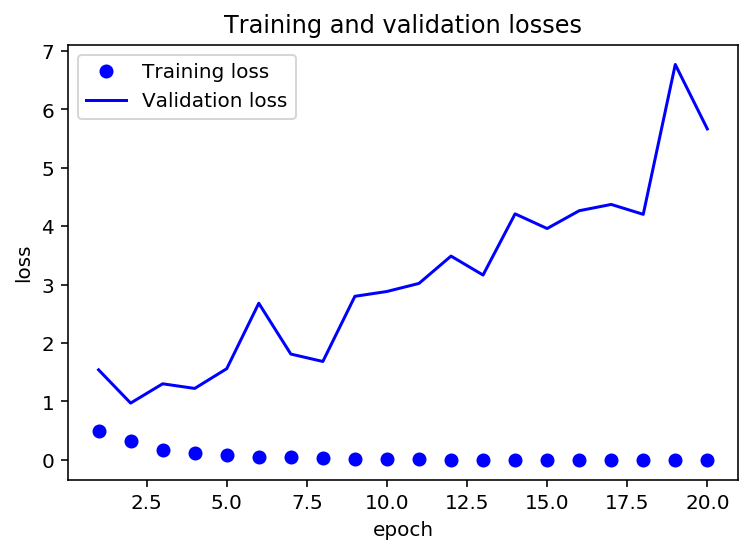

In [50]:
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

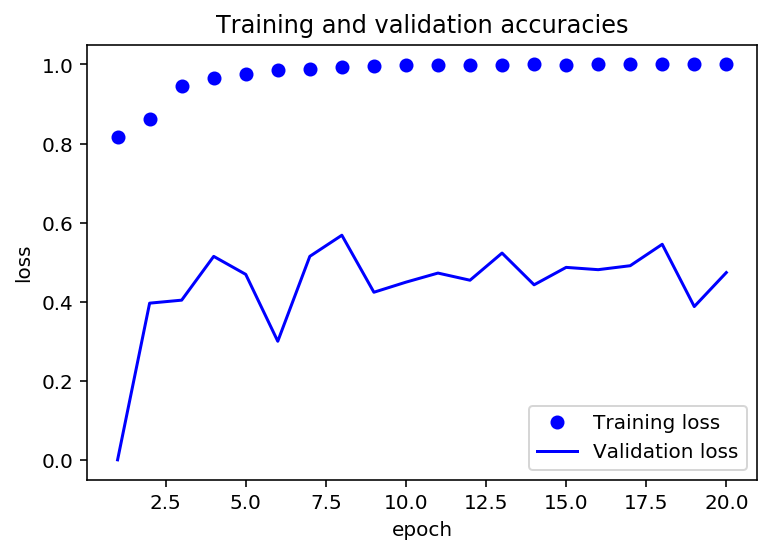

In [51]:
plt.plot(epochs, history.history['acc'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_acc'], 'b', label='Validation loss')
plt.title('Training and validation accuracies')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [52]:
history = model.fit(x_test, y_test, epochs=4, batch_size=512)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 1s 37us/sample - loss: 0.8919 - acc: 0.8442
Epoch 2/4
25000/25000 [==============================] - 1s 35us/sample - loss: 0.3311 - acc: 0.8825
Epoch 3/4
25000/25000 [==============================] - 1s 35us/sample - loss: 0.2356 - acc: 0.9078
Epoch 4/4
25000/25000 [==============================] - 1s 35us/sample - loss: 0.1863 - acc: 0.9283


In [53]:
results = model.evaluate(x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Whereas increasing the number of hidden units did not help the trianing accuracy, increasing the number of layers did.

# Multiclass Classification

Here, we'll use the Reuters dataset, which is divided into 46 disctinct topics. We have to do the same thing that we did for the IMDB dataset because Google won't let us pull the dataset directly.

In [54]:
data = np.load('reuters.npz', allow_pickle=True)

In [55]:
for key in data:
    print(key)

y
x


In [56]:
x_data = data['x']
y_data = data['y']

In [57]:
x_data.shape

(11228,)

In [58]:
y_data.shape

(11228,)

In [59]:
x_data[0:1]

array([list([6216, 667, 1907, 1, 118, 4, 1, 6680, 662, 2342, 25470, 1, 1716, 221, 375, 107, 6, 2344, 1163, 10, 1, 1179, 5137, 567, 1116, 10806, 408, 54, 42, 82, 4443, 11930, 1810, 5, 4, 22, 1210, 906, 1, 1707, 242, 1075, 1, 5137, 30, 27, 578, 49, 26, 6866, 10, 1, 118, 270, 101, 269, 59, 2554, 3879, 1229, 2, 373, 2296, 529, 7, 1361, 132, 10, 1, 757, 2, 41, 1035, 8, 109, 41, 1060, 25, 1, 311, 1882, 51, 26, 928, 13, 2298, 21, 662, 2790, 154, 18, 16150, 31, 774, 4, 1, 6866, 282, 11930, 1810, 5, 141, 20, 322, 123, 2903, 40, 3, 697, 386, 1355, 460, 662, 20, 322, 551, 40, 3319, 37, 11929, 716, 3, 39, 150, 28, 132, 6680, 460, 825, 225, 56, 44, 8, 1229, 6, 85, 3822, 25, 964, 56, 29, 8, 141, 52, 7, 801, 6443, 4714, 1229, 322, 4, 1, 1911, 2, 683, 20071, 970, 6, 2838, 141, 52, 4551, 40, 3, 697, 386, 2, 49, 662, 38, 27, 4205, 10, 195, 40, 7139, 52, 186, 7442, 24126, 4, 4510, 6680, 5346, 1167, 4, 1108, 2, 1, 243, 1349, 114, 326, 585, 683, 54, 382, 7, 545, 356, 2, 122, 662, 378, 18, 16150, 11930, 181

The data appears to have the same structure as the IMDB dataset. This one is not split into training and testing datasets, so we'll need to do that. First, filter the data to have only the top 10000 words.

In [60]:
def filter_data(data, num_words=10000):
    filtered_data = []
    for i in range(len(data)):
        data_instance = np.asarray(data[i])
        data_filt = data_instance[data_instance<num_words]
        filtered_data.append(list(data_filt))
    return filtered_data

In [61]:
x_filtered = filter_data(x_data)

In [62]:
x_filtered[0:1]

[[6216,
  667,
  1907,
  1,
  118,
  4,
  1,
  6680,
  662,
  2342,
  1,
  1716,
  221,
  375,
  107,
  6,
  2344,
  1163,
  10,
  1,
  1179,
  5137,
  567,
  1116,
  408,
  54,
  42,
  82,
  4443,
  1810,
  5,
  4,
  22,
  1210,
  906,
  1,
  1707,
  242,
  1075,
  1,
  5137,
  30,
  27,
  578,
  49,
  26,
  6866,
  10,
  1,
  118,
  270,
  101,
  269,
  59,
  2554,
  3879,
  1229,
  2,
  373,
  2296,
  529,
  7,
  1361,
  132,
  10,
  1,
  757,
  2,
  41,
  1035,
  8,
  109,
  41,
  1060,
  25,
  1,
  311,
  1882,
  51,
  26,
  928,
  13,
  2298,
  21,
  662,
  2790,
  154,
  18,
  31,
  774,
  4,
  1,
  6866,
  282,
  1810,
  5,
  141,
  20,
  322,
  123,
  2903,
  40,
  3,
  697,
  386,
  1355,
  460,
  662,
  20,
  322,
  551,
  40,
  3319,
  37,
  716,
  3,
  39,
  150,
  28,
  132,
  6680,
  460,
  825,
  225,
  56,
  44,
  8,
  1229,
  6,
  85,
  3822,
  25,
  964,
  56,
  29,
  8,
  141,
  52,
  7,
  801,
  6443,
  4714,
  1229,
  322,
  4,
  1,
  1911,
  2,
  683,
  970,
  6,

In [64]:
max([max(sequence) for sequence in x_filtered[:1000]])

9999

In [65]:
x_filtered = np.asarray(x_filtered)
y_data = np.asarray(y_data)

In [66]:
x_filtered.shape

(11228,)

In [67]:
y_data.shape

(11228,)

Good. The x_data is filtered properly, and the empty list of integers is removed. Eventually, we want to split the data 80/20 for training and testing, but we need to make sure we have an appropriate distribution of the split. We'll use the built-in _stratify_ option in sklearn's train_test_split(), stratifying on y_data.

In [68]:
np.unique(y_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_vectorized = vectorize_sequences(x_filtered)
# x_test_vec = vectorize_sequences(x_test)

In [72]:
x_vectorized.shape

(11228, 10000)

We also want to encode the labels, which we can do with _to_categorical()_.

In [73]:
one_hot_labels = keras.utils.to_categorical(y_data)

In [74]:
one_hot_labels.shape

(11228, 46)

In [75]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x_vectorized, one_hot_labels, train_size=0.8, stratify=one_hot_labels)

In [76]:
x_train_partial, x_val, y_train_partial, y_val = train_test_split(x_train_full, y_train_full, test_size=0.1, stratify=y_train_full)

We now have 46 classes to identify, so we want to use more than 16 units per layer. Let's use 64.

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

In this case, out loss function will be categorical crossentropy. This measures the distance between two probability distributions, namely the distribution of the output of the network, and the true distribution of the labels.

In [78]:
model.compile(optmimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


Let's also validate on 1000 samples.

In [80]:
history = model.fit(x_train_partial, 
                    y_train_partial,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 1s 162us/sample - loss: 2.5950 - accuracy: 0.5435 - val_loss: 1.7192 - val_accuracy: 0.6641
Epoch 2/20
8083/8083 [==============================] - 1s 63us/sample - loss: 1.4475 - accuracy: 0.7049 - val_loss: 1.3375 - val_accuracy: 0.7030
Epoch 3/20
8083/8083 [==============================] - 1s 66us/sample - loss: 1.0941 - accuracy: 0.7679 - val_loss: 1.1734 - val_accuracy: 0.7419
Epoch 4/20
8083/8083 [==============================] - 0s 61us/sample - loss: 0.8728 - accuracy: 0.8178 - val_loss: 1.0727 - val_accuracy: 0.7642
Epoch 5/20
8083/8083 [==============================] - 1s 62us/sample - loss: 0.6905 - accuracy: 0.8576 - val_loss: 1.0240 - val_accuracy: 0.7820
Epoch 6/20
8083/8083 [==============================] - 0s 62us/sample - loss: 0.5483 - accuracy: 0.8895 - val_loss: 0.9784 - val_accuracy: 0.7764
Epoch 7/20
8083/8083 [==============================] - 0s 62us/sample

In [81]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [82]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

In [83]:
epochs = range(1, len(loss) + 1)

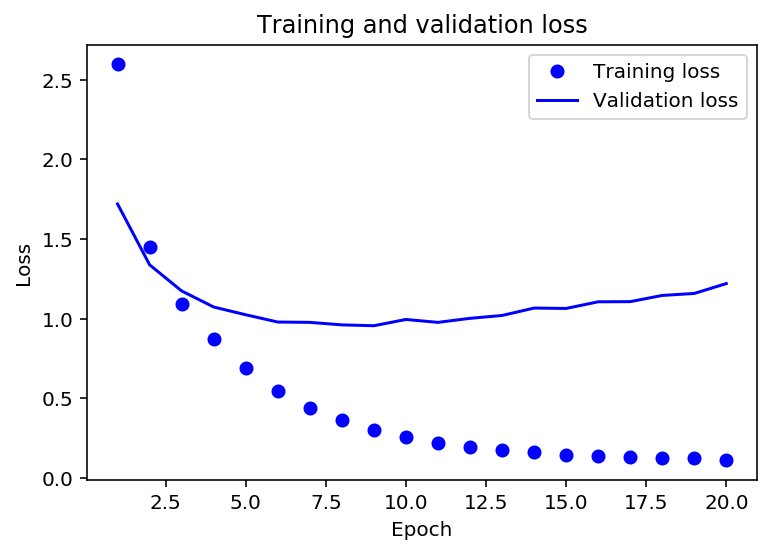

In [84]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

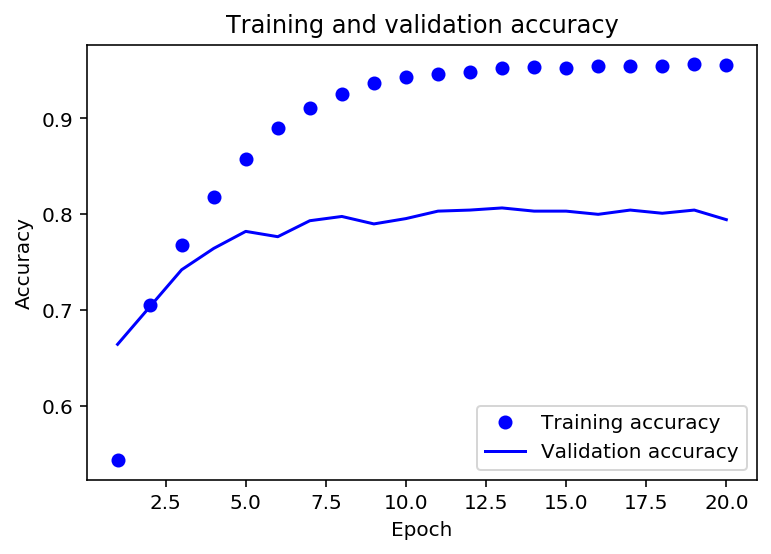

In [85]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Looks like the model begins to overfit after 9 epochs. Let's retrain again with 9epochs only.

In [86]:
model.compile(optmimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [87]:
model.fit(x_train_partial,
         y_train_partial,
         epochs=5,
         batch_size=512,
         validation_data=(x_val, y_val))

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 161us/sample - loss: 0.1435 - accuracy: 0.9555 - val_loss: 1.2111 - val_accuracy: 0.8020
Epoch 2/5
8083/8083 [==============================] - 0s 61us/sample - loss: 0.1109 - accuracy: 0.9574 - val_loss: 1.2601 - val_accuracy: 0.7887
Epoch 3/5
8083/8083 [==============================] - 0s 61us/sample - loss: 0.1097 - accuracy: 0.9565 - val_loss: 1.2326 - val_accuracy: 0.8042
Epoch 4/5
8083/8083 [==============================] - 0s 62us/sample - loss: 0.1048 - accuracy: 0.9573 - val_loss: 1.3112 - val_accuracy: 0.7898
Epoch 5/5
8083/8083 [==============================] - 0s 61us/sample - loss: 0.1079 - accuracy: 0.9557 - val_loss: 1.2672 - val_accuracy: 0.7964


In [89]:
results = model.evaluate(x_test, y_test)

2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [90]:
results

[1.1889412637438397, 0.8005343]

These results are pretty good. Getting 80% accuracy. Compare that to a completely random classifier for a dataset with 46 classes:

In [91]:
import copy

In [92]:
np.unique(y_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [96]:
test_labels_copy = copy.copy(y_data)
np.random.shuffle(test_labels_copy)
hits_array = np.array(y_data) == np.array(test_labels_copy)

In [98]:
float(np.sum(hits_array) / len(y_data))

0.18070894193088707

Only about 18% accuracy with a random classifier. The model performs much better than a random classifier.

__Of note__: I previously had spent a decent amount of effort trying to remove a blank entry in the dataset. This was not necessary. Additionally, the model performed much better when applying _train_test_split()_ after the data was vectorized and the labels were one-hot encoded.

In [99]:
predictions = model.predict(x_test)

In [100]:
predictions[0].shape

(46,)

In [101]:
np.sum(predictions[0])

1.0

In [102]:
np.argmax(predictions[0])

3

Since the output layer has 46 units (the output data is 46-dimensional), it would introduce an information bottleneck to have hidden layers with less than 46 units.

In [106]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

In [107]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [108]:
model.fit(x_train_partial,
         y_train_partial,
         epochs=20,
         batch_size=512,
         validation_data=(x_val, y_val))

Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 1s 163us/sample - loss: 3.1931 - accuracy: 0.3408 - val_loss: 2.7349 - val_accuracy: 0.3526
Epoch 2/20
8083/8083 [==============================] - 0s 59us/sample - loss: 2.4874 - accuracy: 0.3538 - val_loss: 2.3566 - val_accuracy: 0.3515
Epoch 3/20
8083/8083 [==============================] - 0s 60us/sample - loss: 2.1678 - accuracy: 0.3542 - val_loss: 2.1370 - val_accuracy: 0.3571
Epoch 4/20
8083/8083 [==============================] - 1s 62us/sample - loss: 1.9477 - accuracy: 0.4297 - val_loss: 1.9690 - val_accuracy: 0.4861
Epoch 5/20
8083/8083 [==============================] - 0s 61us/sample - loss: 1.7518 - accuracy: 0.5290 - val_loss: 1.8290 - val_accuracy: 0.5139
Epoch 6/20
8083/8083 [==============================] - 0s 61us/sample - loss: 1.5736 - accuracy: 0.5705 - val_loss: 1.6850 - val_accuracy: 0.5673
Epoch 7/20
8083/8083 [==============================] - 0s 61us/sample

The model now peaks at about 70% validation accuracy, a drop of about 9%. Now let's try again with 128 hidden units per layer.

In [109]:
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

In [110]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [111]:
model.fit(x_train_partial,
         y_train_partial,
         epochs=20,
         batch_size=512,
         validation_data=(x_val, y_val))

Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 2s 221us/sample - loss: 2.2683 - accuracy: 0.5573 - val_loss: 1.4350 - val_accuracy: 0.6785
Epoch 2/20
8083/8083 [==============================] - 1s 89us/sample - loss: 1.1530 - accuracy: 0.7516 - val_loss: 1.1259 - val_accuracy: 0.7597
Epoch 3/20
8083/8083 [==============================] - 1s 83us/sample - loss: 0.8006 - accuracy: 0.8330 - val_loss: 1.0275 - val_accuracy: 0.7809
Epoch 4/20
8083/8083 [==============================] - 1s 82us/sample - loss: 0.5907 - accuracy: 0.8783 - val_loss: 0.9777 - val_accuracy: 0.7976
Epoch 5/20
8083/8083 [==============================] - 1s 87us/sample - loss: 0.4285 - accuracy: 0.9115 - val_loss: 0.9607 - val_accuracy: 0.7976
Epoch 6/20
8083/8083 [==============================] - 1s 81us/sample - loss: 0.3241 - accuracy: 0.9297 - val_loss: 0.9426 - val_accuracy: 0.8031
Epoch 7/20
8083/8083 [==============================] - 1s 83us/sample

This model is peaking in the high 70% region... the same as with 64 hidden units. Let's now add another hidden layer.

In [113]:
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

In [114]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [115]:
model.fit(x_train_partial,
         y_train_partial,
         epochs=20,
         batch_size=512,
         validation_data=(x_val, y_val))

Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 2s 215us/sample - loss: 2.2269 - accuracy: 0.4889 - val_loss: 1.4447 - val_accuracy: 0.6774
Epoch 2/20
8083/8083 [==============================] - 1s 96us/sample - loss: 1.2033 - accuracy: 0.7257 - val_loss: 1.2026 - val_accuracy: 0.7330
Epoch 3/20
8083/8083 [==============================] - 1s 106us/sample - loss: 0.8580 - accuracy: 0.8075 - val_loss: 1.0525 - val_accuracy: 0.7653
Epoch 4/20
8083/8083 [==============================] - 1s 86us/sample - loss: 0.6302 - accuracy: 0.8593 - val_loss: 1.0080 - val_accuracy: 0.7942
Epoch 5/20
8083/8083 [==============================] - 1s 85us/sample - loss: 0.4595 - accuracy: 0.9015 - val_loss: 0.9946 - val_accuracy: 0.7953
Epoch 6/20
8083/8083 [==============================] - 1s 85us/sample - loss: 0.3779 - accuracy: 0.9182 - val_loss: 0.9706 - val_accuracy: 0.8009
Epoch 7/20
8083/8083 [==============================] - 1s 84us/sampl

Given the current hyperparameters being adjusted (hidden units, hidden layers), 80% seems to be about the best we can achieve.

# Regression Example: Boston Housing Data

In [117]:
from tensorflow.keras.datasets import boston_housing

In [118]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/boston_housing.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)

In [125]:
data = np.load('boston_housing.npz', allow_pickle=True)

In [126]:
for key in data.keys():
    print(key)

y
x


Here again we just have x and y data.

In [127]:
x_data = data['x']
y_data = data['y']

In [128]:
x_data.shape

(506, 13)

In [129]:
y_data.shape

(506,)

There are 506 samples, with 13 features each for the x_data

In [130]:
x_data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [133]:
y_data[0]

24.0

The book has an 80/20 train/test split, so we'll do the same.

In [135]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x_data, y_data, train_size=0.8)

It would cause problems to feed data into a neural network values that take on wildly different ranges. Looking at x_data[0], we can see the scales are much different. To correct this, we need to modify the data by normalizing it. Specifically, we want each feature to have a mean of zero and a standard deviation of 1.

In [136]:
mean = x_train_full.mean(axis=0)

In [137]:
mean

array([3.59561923e+00, 1.12165842e+01, 1.10061881e+01, 6.43564356e-02,
       5.54972525e-01, 6.27909406e+00, 6.86814356e+01, 3.81848193e+00,
       9.58415842e+00, 4.06836634e+02, 1.84665842e+01, 3.53678688e+02,
       1.27303465e+01])

In [138]:
std = x_train_full.std(axis=0)

In [139]:
x_train_full -= mean
x_train_full /= std

In [140]:
x_test -= mean
x_test /= std

In [141]:
x_train_full.mean(axis=0)

array([-1.37129032e-16, -9.70071108e-17,  2.23803374e-15, -3.12181524e-16,
       -1.16518456e-15, -3.43207311e-15, -5.27630744e-16,  7.35385350e-16,
        3.51753830e-17, -5.11142284e-17,  2.62130801e-14,  8.45720633e-15,
       -1.50072474e-15])

In [142]:
x_train_full.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Notice that the testing data is normalized using the values computed from the training data. Machine/deep learning workflows should never use any information obtained from the test data.

We don't have a lot of samples here, so we want to use a smaller network to prevent overfitting. We'll create a helper function to build the network since we'll be instantiating it multiple times.

In [149]:
def build_model():
    model = keras.models.Sequential([
        keras.layers.Dense(64, activation='relu',
                          input_shape=(x_train_full.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])
    return model

Since this is a regression model, we don't want any non-linearity on the output layer. The lack of activation function makes the output linear, which we want with scalar regression.

The mean squared error loss is widely used for regression problems. Additionally, the metric being used is mean absolute error. For this problem, since the labels are in thousands of dollars, an MAE of 0.5 represents 500 dollars.

## K-fold validation

This dataset is too small to hold back some of the data for validation. Instead, we will use k-fold validation. The data is split into k partitions, and the data is trained on k-1 partitions and validated on the remaining partitions. The validation score for the model is then the average of the k validation scores.

In [147]:
k = 4
num_val_samples = len(x_train_full) // k
num_epochs = 100
all_scores = []

In [151]:
for i in range(k):
    print(f'processing fold # {i}')
    val_data = x_train_full[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train_full[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([x_train_full[:i * num_val_samples],
                                       x_train_full[(i + 1) * num_val_samples:]],
                                       axis=0)
    partial_train_targets = np.concatenate([y_train_full[:i * num_val_samples],
                                           y_train_full[(i + 1) * num_val_samples:]],
                                          axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, batch_size=1, verbose=0, epochs=num_epochs)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Let's see how the model performed.

In [152]:
all_scores

[2.8199508, 2.4978447, 2.8422616, 2.6102648]

In [153]:
np.mean(all_scores)

2.6925805

The average error is about 2700 dollars, which is not insignificant considering the range of data is 10000 to 50000.

Let's now train for longer... 500 epochs. We'll modify the training loop to record the validation score at each epoch.

In [158]:
num_epochs=500
all_mae_histories = []
for i in range(k):
    print(f'processing fold # {i}')
    val_data = x_train_full[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train_full[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([x_train_full[:i * num_val_samples],
                                       x_train_full[(i + 1) * num_val_samples:]],
                                       axis=0)
    partial_train_targets = np.concatenate([y_train_full[:i * num_val_samples],
                                           y_train_full[(i + 1) * num_val_samples:]],
                                          axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, batch_size=1, verbose=0, epochs=num_epochs,
             validation_data = (val_data, val_targets))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Now we can compute the average of the per-epoch MAE scores for all folds.

In [164]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

The above embedded list comprehension iterates through the inner loop first, taking the mean of the 4 folds at each epoch.

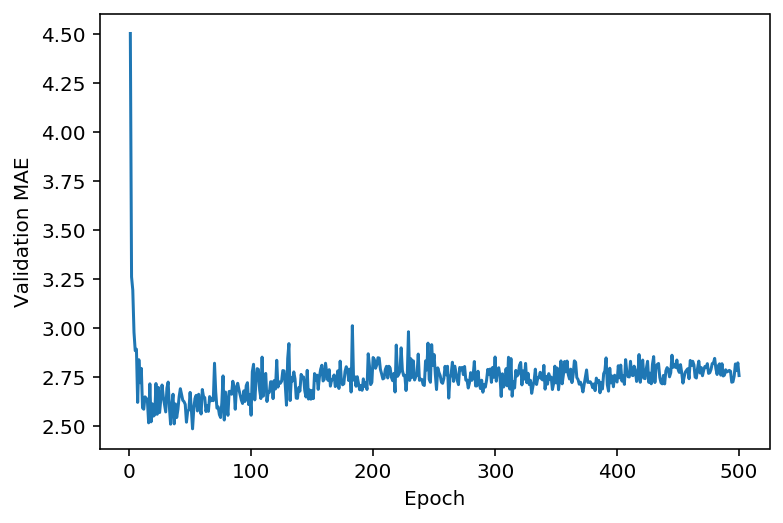

In [180]:
plt.plot(range(1, num_epochs + 1), average_mae_history)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.show()

The scale and variance makes the graph a little hard to read. Let's drop the first 10 points and replace each point with an exponential moving average of the previous points.

In [181]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [183]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

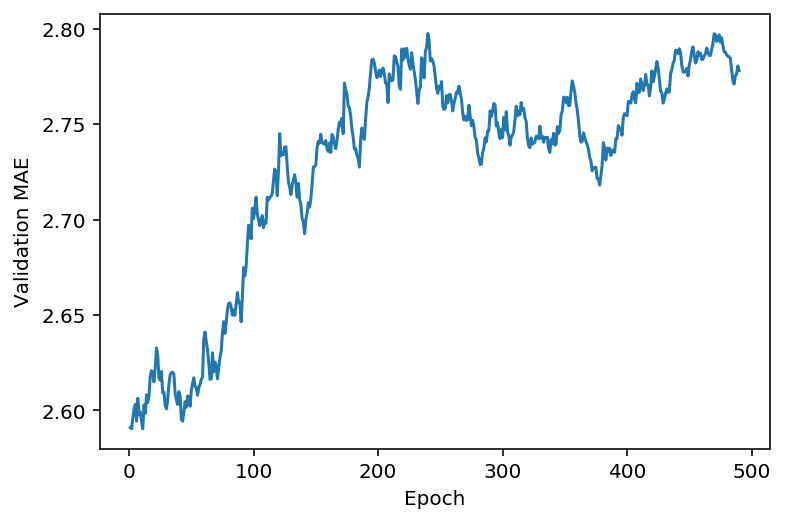

In [185]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.show()

From here, it looks like 50 epochs or so is where the model starts to overfit.

In [186]:
model = build_model()

In [187]:
model.fit(x_train_full, y_train_full,
         epochs=50, batch_size=16, verbose=0)

In [189]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_train)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

I accidentally used the name "y_train" instead of "y_test" when creating the data originally. Here, we're still off by about 2300.